### Making a data frame with an x and y column

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn import metrics


data = {
    "x": [5, 10, 15, 20, 25, 30],
    "y": [2, 6, 12, 10, 16, 22]
}

data_df = pd.DataFrame(data)

In [27]:
data_df.head()

,x,y
0,5,2
1,10,6
2,15,12
3,20,10
4,25,16


### Showing the scatter plot of the two columns

Text(0, 0.5, 'This is the Y values')

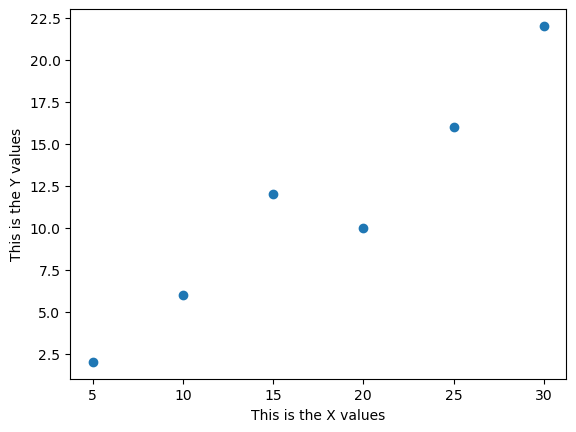

In [30]:
plt.scatter(data_df["x"], data_df["y"])
plt.xlabel("This is the X values")
plt.ylabel("This is the Y values")



### Splitting the data in a training DataFrame, training y Series, test DataFrame and test y Series  

In [33]:
""" 
X = data_df[["x"]]
y = data_df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)
"""

# Define indices for testing (e.g., rows 2, 5, and 8)
test_indices = [5]

# Create boolean masks for selecting rows
test_mask = data_df.index.isin(test_indices)
train_mask = ~test_mask

# Split the data based on masks
X_train = data_df[train_mask][['x']]
y_train = data_df[train_mask]['y']
X_test = data_df[test_mask][['x']]
y_test = data_df[test_mask]['y']



In [35]:
print(y_test)

5    22
Name: y, dtype: int64


In [37]:
print(test_mask)

[False False False False False  True]


### Creating an instance of a LinearRegression() model

In [40]:
model = LinearRegression()

### Training the model

In [43]:
# Train (fit) the model using the training data
model.fit(X_train, y_train)

LinearRegression()

### Calculating pearson's r

In [71]:

y_pred = model.predict(X_train)

r, _ = pearsonr(y_train, y_pred)

print(r)

0.9363291775690445


### Calculating R^2/R squared

#### Using the models score method to calculate r2

In [75]:
r2 = model.score(X_train, y_train)

In [77]:
print(r2)

0.8767123287671232


#### Using pearson's r to calculate the r2 

In [80]:
print(r*r)

0.8767123287671234


#### Calculating r2 through the variance of the y and variance of the predicted y

##### Variance of the y (the average distance from all the y's from the mean of y)

In [143]:
# The ddof=0 beneath makes sure the the Bessels correction (-1) isn't included in the formular calculating the variance 
# and that is because in this example my data is population data, that is: it is NOT a sample, it is the TOTAL data

y_var = y_train.var(ddof=0)
print(y_var)

23.36


In [145]:
total_variance = y_var * 5

print(total_variance)

116.8


##### Calculating the variance of the predicted y's

###### Calculating the actual mean of the y

In [149]:
y_mean = np.mean(y_train)
print(y_mean)

9.2


###### Making prediction on the same data set the model has been trained on

In [152]:
predictions = model.predict(X_train[['x']])
print(predictions)

[ 2.8  6.   9.2 12.4 15.6]


###### Calculating the total variance (of y) in the predictions above 

In [155]:
pred_var = 0

for i, prediction in enumerate(predictions):
    pred_var += ((prediction - y_mean) * (prediction - y_mean))

total_pred_var = pred_var
print(total_pred_var)


102.40000000000005


### (R2)

###### Calculating the r2 = percentage of the total variance "explained"/accounted for by the predicted variance

In [159]:
standard_dev_y_predicted = total_pred_var/total_variance
print(standard_dev_y_predicted)

0.8767123287671237


### Getting the slope and intercept of the model (a and b in the y = ax + b created)

In [162]:
a = model.coef_[0]
print(a)

0.6400000000000001


In [164]:
intercept = model.intercept_
print(intercept)

-0.40000000000000213
